In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed/WESAD/data_processed/30s/all_data.csv', index_col=0)
df.head(5)

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1


In [3]:
features = ['HR', 'EDA_mean', 'RMSSD', 'RESP_rate', 'net_acc_mean']

In [4]:
mask = pd.Series(True, index=df.index)

In [5]:
for subject in df['subject'].unique():
    for label in df['label'].unique():
        sub_df = df[(df['subject'] == subject) & (df['label'] == label)]
        for feature in features:
            q1 = sub_df[feature].quantile(0.25)
            q3 = sub_df[feature].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outlier_mask = (df['subject'] == subject) & (df['label'] == label) & (
                            (df[feature] < lower) | (df[feature] > upper))
            mask[outlier_mask] = False

df = df[mask].reset_index(drop=True)

In [6]:
df.to_csv('../../data/processed/WESAD/data_processed/30s/eda_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACC_x_mean       907 non-null    float64
 1   ACC_y_mean       907 non-null    float64
 2   ACC_z_mean       907 non-null    float64
 3   net_acc_mean     907 non-null    float64
 4   net_acc_std      907 non-null    float64
 5   EDA_mean         907 non-null    float64
 6   EDA_std          907 non-null    float64
 7   EDA_slope        907 non-null    float64
 8   RESP_rate        907 non-null    float64
 9   RESP_regularity  907 non-null    float64
 10  HR               907 non-null    float64
 11  IBI              907 non-null    float64
 12  RMSSD            907 non-null    float64
 13  SDNN             907 non-null    float64
 14  pNN50            907 non-null    float64
 15  lf/hf            907 non-null    float64
 16  label            907 non-null    int64  
 17  subject         

In [8]:
df.value_counts('focus_label')

focus_label
1    508
0    399
Name: count, dtype: int64

## Univariate analysis

In [9]:
features = ['HR', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'EDA_mean', 'RESP_rate', 'net_acc_mean']

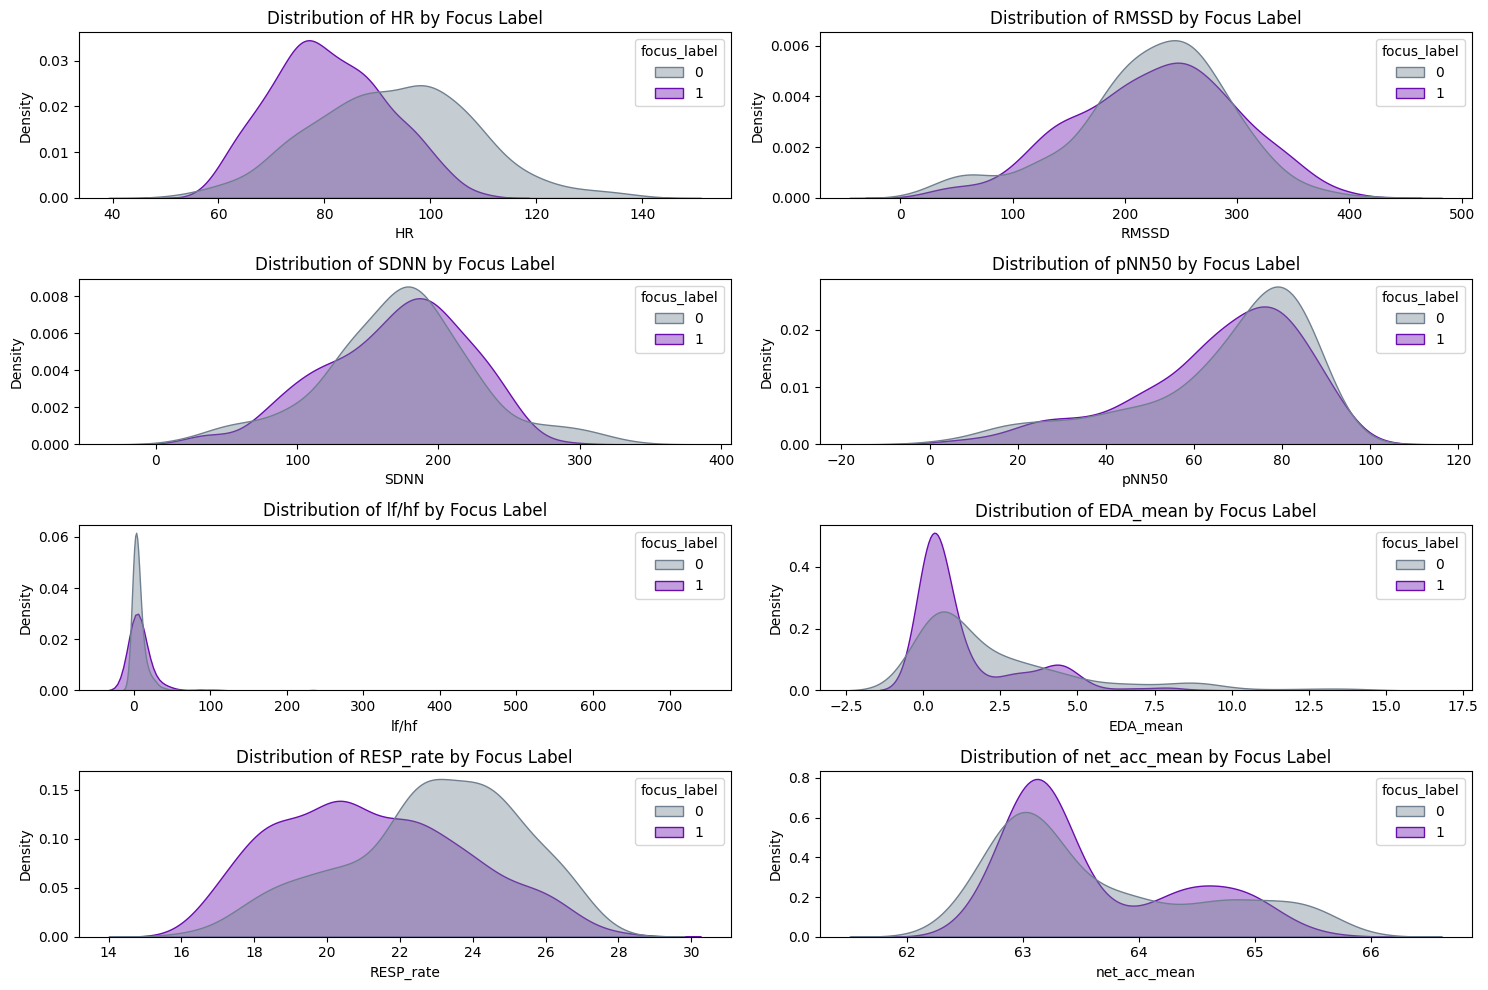

In [10]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=feature, hue='focus_label', common_norm=False,
                palette={0: "#708090", 1: "#6A0DAD"}, fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by Focus Label')
plt.tight_layout()
plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['focus_label', 'label', 'subject'])
corr = numeric_cols.corr()

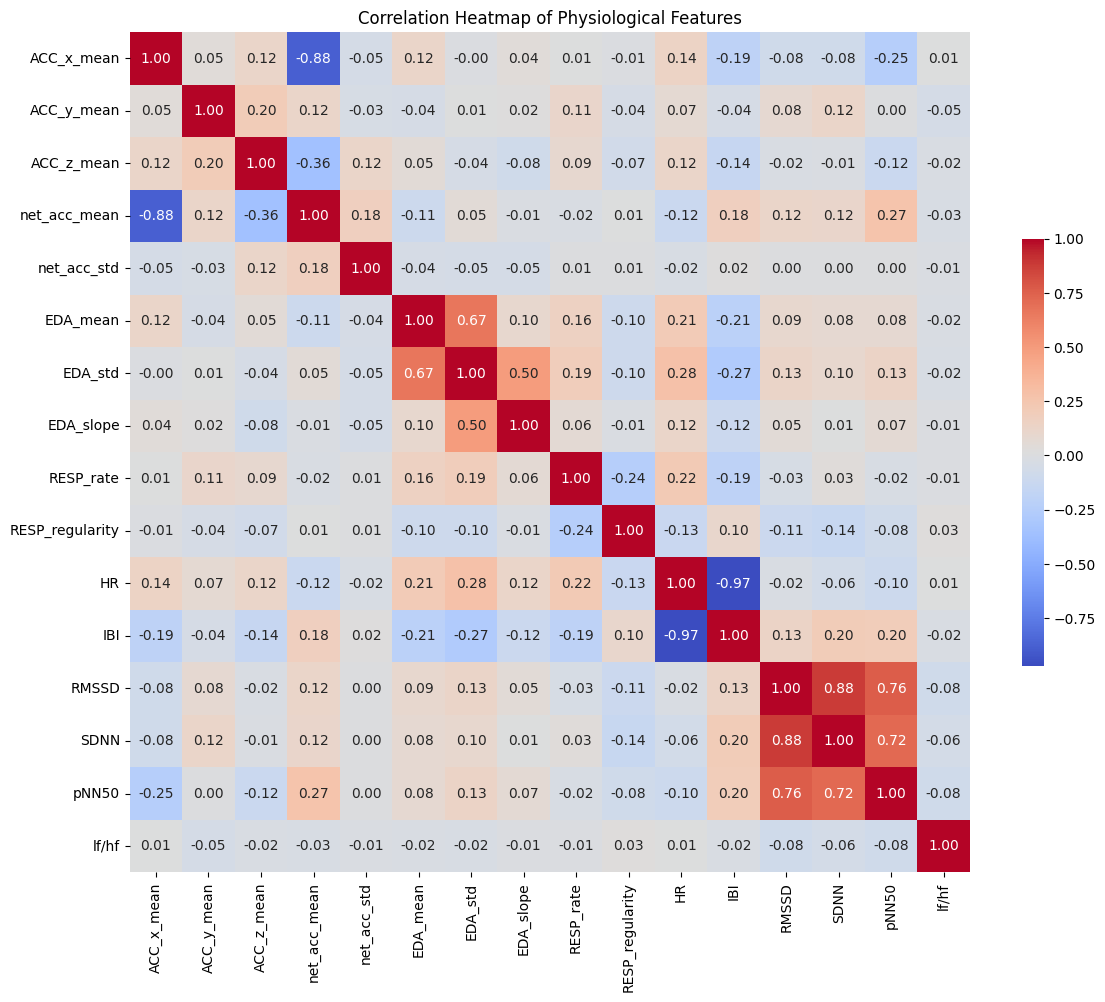

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Heatmap of Physiological Features")
plt.tight_layout()
plt.show()